# Fast Fourier Transform


In [208]:
import numpy as np
import matplotlib.pyplot as plt

In [210]:
def FFT(P):
    j = np.complex(0,1)
    # P = [p0,p1,...,p_(n-1)] coeff rep
    n = len(P)
    if n == 1:
        return P
    omega = np.exp(2*np.pi*j/n)
    P_e, P_o = P[::2], P[1::2]
    y_e, y_o = FFT(P_e), FFT(P_o)

    y = [0] * n
    for i in range(n/2):
        y[i] = y_e[i] + (omega**j)*y_o[i]
        y[i+n/2] = y_e[i] - (omega**j)*y_o[i]
    return y


In [72]:
def IFFT(P):
    j = np.complex(0,1)
    # P = [p0,p1,...,p_(n-1)] coeff rep
    n = len(P)
    if n == 1:
        return P
    omega = (1/n)*np.exp(-2*np.pi*j/n)
    P_e, P_o = P[::2], P[1::2]
    y_e, y_o = IFFT(P_e), IFFT(P_o)

    y = [0] * n
    for i in range(n/2):
        y[i] = y_e[i] + (omega**j)*y_o[i]
        y[i+n/2] = y_e[i] - (omega**j)*y_o[i]
    return y


# example 1
Lets look at the example $C(x) = A(x)\times B(x)$:
$$A(x) \ = \ x^2 + 2x+1$$
$$B(x) \ = \ x^2 - 2x+1$$

In [250]:
def A(x):
    return x**2 + 2*x + 1

def B(x):
    return x**2 - 2*x + 1

steps = 1024 # 1000000000000000000
xs = np.linspace(-2,2, steps)

f = list(map(A,xs))
g = list(map(B,xs))
fxg = list(map(lambda x: A(x)*B(x), xs))

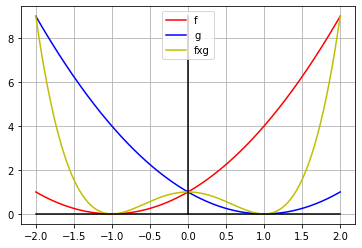

In [245]:
plt.figure()
plt.plot(xs, f, color = 'r', label = 'f')
plt.plot(xs, g, color = 'b', label = 'g')
plt.plot(xs, fxg, color = 'y', label = 'fxg')
plt.grid()
plt.legend(loc='upper center')
plt.plot([0 for _ in range(steps)], np.linspace(min(min(f),min(g),min(fxg)),max(max(f),max(g),max(fxg)), steps), color = 'k') # y axis bold
plt.plot(np.linspace(min(xs), max(xs), steps), [0 for _ in range(steps)], color = 'k') # x axis bold

(0, 20)

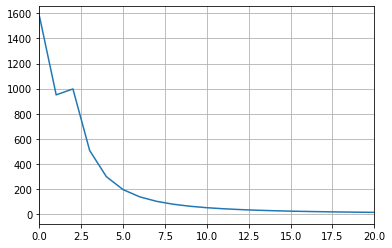

In [255]:
decomposition = np.fft.fft(fxg)
reals = list(map(np.real, decomposition))
imaginaries = list(map(np.imag, decomposition))
magnitudes = list(map(np.absolute, decomposition))

plt.plot(magnitudes)
plt.grid()
plt.xlim([0,20])

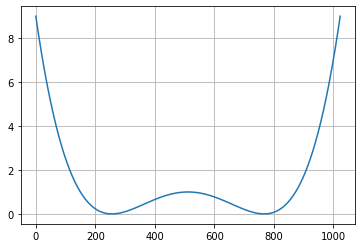

In [254]:
orig_func = np.fft.ifft(decomposition)
magnitudes = list(map(np.absolute, orig_func))
frequencies = list(map(np.real, orig_func)) # real components
imaginaries = list(map(np.imag, orig_func)) # imaginary components

plt.plot(magnitudes)
plt.grid()

# example 2
$$ A(x) \ = \ cos(x)$$
$$ B(x) \ = \ cos(2x)$$

In [247]:
steps = 1024 
xs = np.linspace(-2*np.pi,2*np.pi, steps)

def wave(x, A=1, lamda=2*np.pi, t=0, f=1/(2*np.pi), phi=0):
    return A*np.cos(2*np.pi*x/lamda + 2*np.pi*f*t + phi)

wave1 = [wave(x) for x in xs] # y = cos(x)
wave2 = [wave(x, A=2, lamda=np.pi, t=0) for x in xs] # y = cos(2x)

fxg = list(map(lambda x,y: x*y, wave1,wave2))

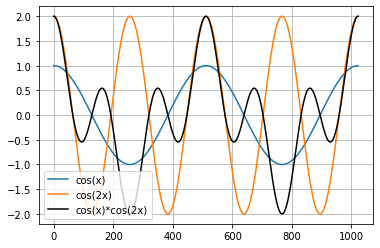

In [248]:
plt.figure(1)
plt.plot(wave1, label="cos(x)")
plt.plot(wave2, label="cos(2x)")
plt.plot(fxg, color="k", label="cos(x)*cos(2x)")
plt.grid()
plt.legend()

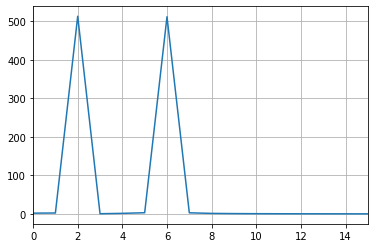

In [249]:
decomposition = np.fft.fft(fxg)
magnitudes = list(map(np.absolute, decomposition))
reals = list(map(np.real, decomposition)) # real components
imaginaries = list(map(np.imag, decomposition)) # imaginary components
plt.plot(magnitudes)
plt.xlim([0,15])
plt.grid()

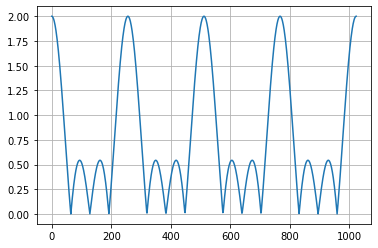

In [242]:
orig_func = np.fft.ifft(decomposition)
magnitudes = list(map(np.absolute, orig_func))
reals = list(map(np.real, orig_func)) # real components
imaginaries = list(map(np.imag, orig_func)) # imaginary components

plt.plot(magnitudes)
plt.grid()

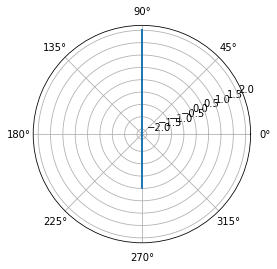

In [243]:
angles = list(map(lambda mag, real: real/mag, magnitudes, reals))
plt.polar(np.arcsin(angles), reals)

# example 3
$$
f(x) = \left\{
\begin{array}{l}
\text{for $-2<x<2$ } & 0.5\\
\text{else} & 0
\end{array}
\right.
$$

In [191]:
def step(x):
    if x < -2 or x > 2:
        return 0
    else:
        return 0.5

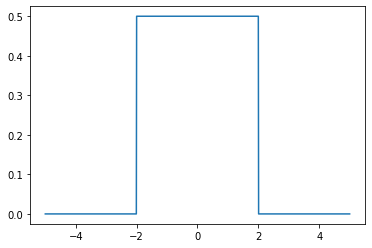

In [218]:
steps = 1024 
xs = np.linspace(-5,5, steps)

step_func = list(map(step,xs))
plt.plot(xs,step_func)

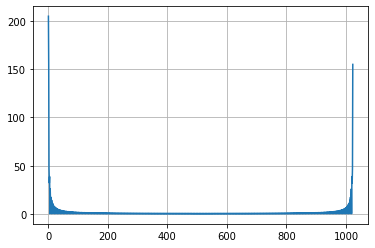

In [221]:
decomposition = np.fft.fft(step_func)
plt.plot(list(map(np.absolute, decomposition)))
#plt.xlim([-1,100])
plt.grid()

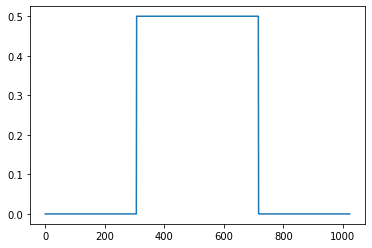

In [224]:
orig_func = np.fft.ifft(decomposition)
magnitudes = list(map(np.absolute, orig_func))
reals = list(map(np.real, orig_func)) # real components
imaginaries = list(map(np.imag, orig_func)) # imaginary components

plt.plot(magnitudes)

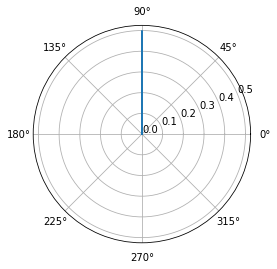

In [228]:
angles = list(map(lambda mag, real: real/mag, magnitudes, reals))
plt.polar(np.arcsin(angles), reals)